In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Load the dataset
df = pd.read_csv("Google stock price.csv")

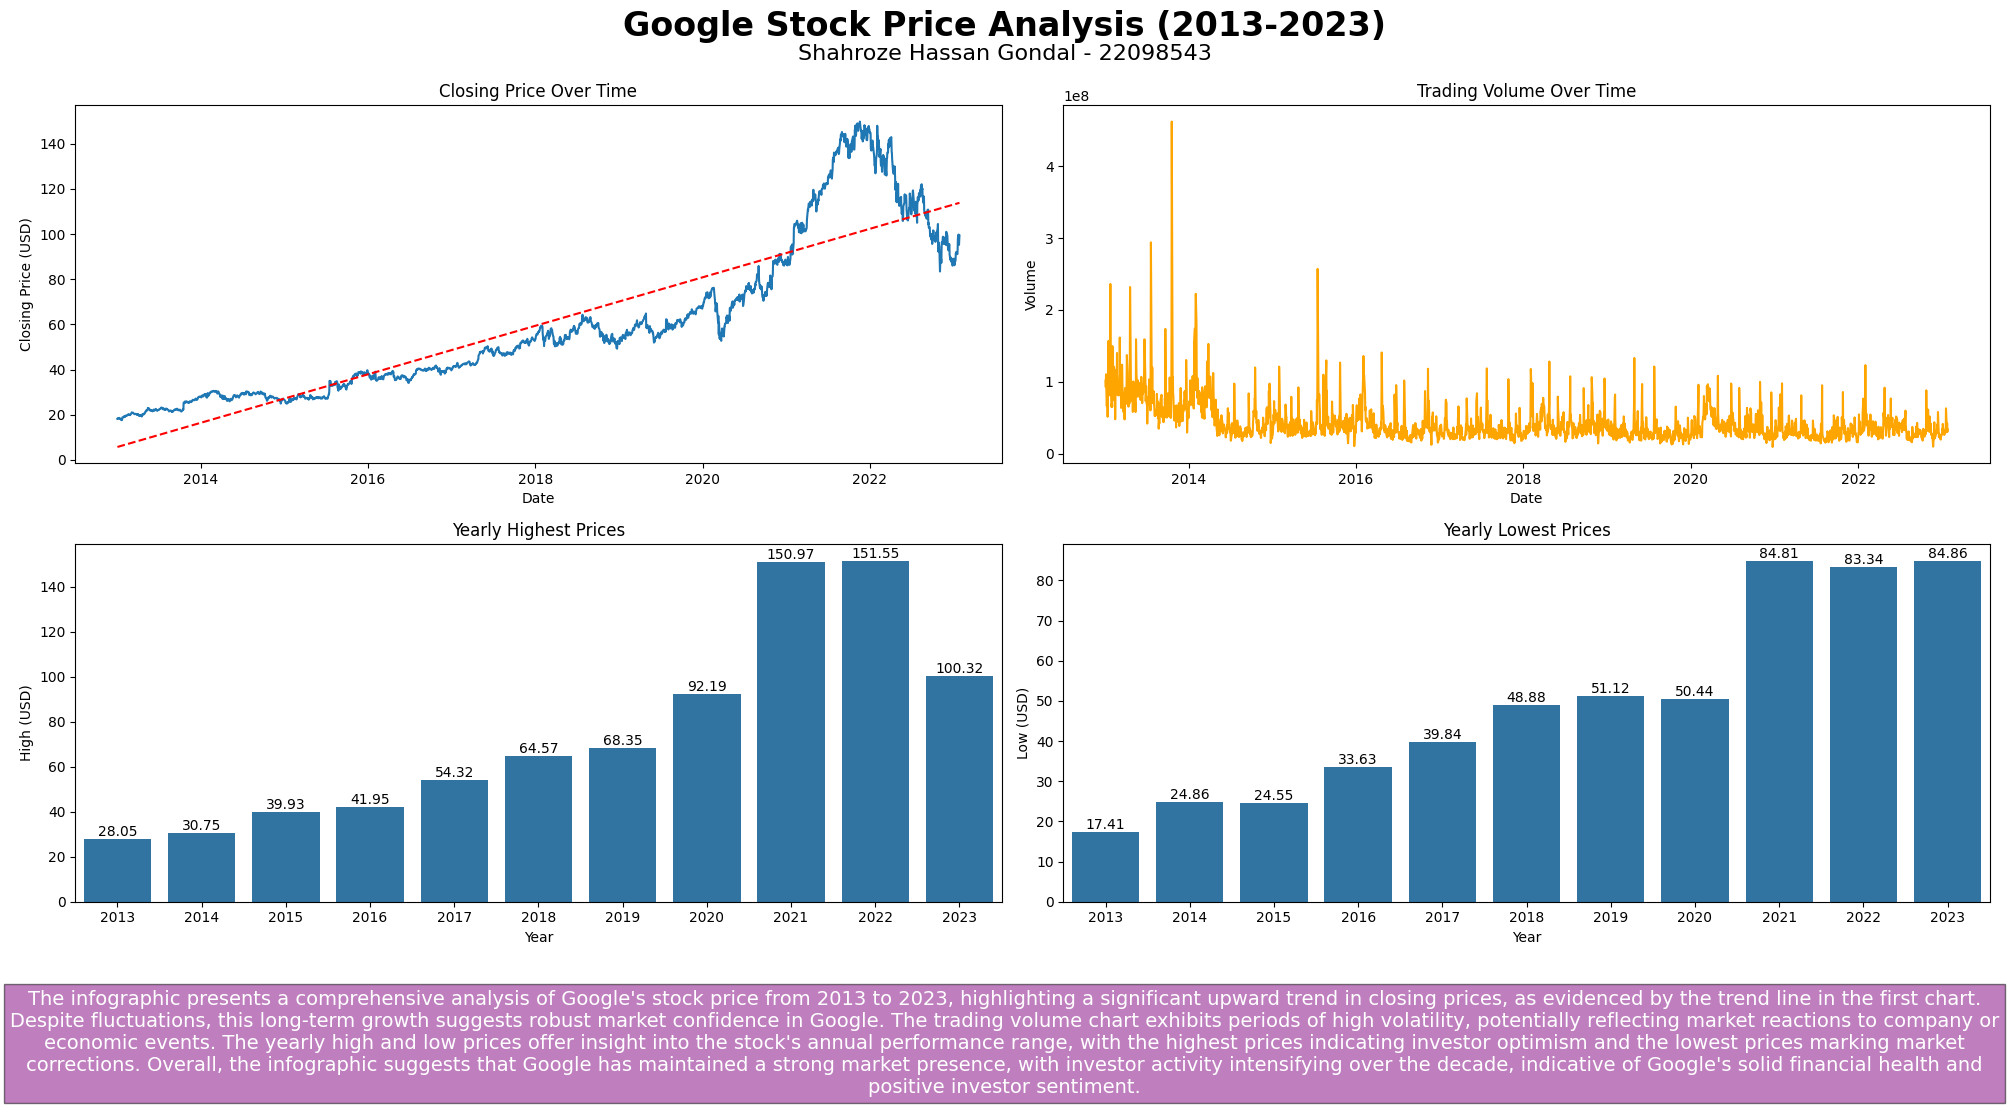

In [4]:
# Compute summary statistics
summary_statistics = df.describe()
# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
# Title and Student information
student_name = 'Shahroze Hassan Gondal'
student_id = '22098543' 
plt.suptitle('Google Stock Price Analysis (2013-2023)', fontsize=24, weight='bold')
student_info = f'{student_name} - {student_id}'
plt.gcf().text(0.5, 0.93, student_info, ha='center', fontsize=16)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Plot 1: Line plot for Closing Price
sns.lineplot(data=df, x='Date', y='Close', ax=axs[0, 0])
axs[0, 0].set_title('Closing Price Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Closing Price (USD)')
# Calculate and plot a trend line
z = np.polyfit(mdates.date2num(df['Date']), df['Close'], 1)
p = np.poly1d(z)
axs[0, 0].plot(df['Date'], p(mdates.date2num(df['Date'])), "r--")
# Plot 2: Line plot for Volume
sns.lineplot(data=df, x='Date', y='Volume', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Trading Volume Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Volume')
# Plot 3: Bar plot for Yearly High
ax = axs[1, 0]
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_high = df.groupby('Year')['High'].max().reset_index()
sns.barplot(x='Year', y='High', data=yearly_high, ax=axs[1, 0])
axs[1, 0].set_title('Yearly Highest Prices')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('High (USD)')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                  
        f'{bar.get_height():.2f}',         
        ha='center',                        
        va='bottom',                        
        fontsize=10                        
    )
# Plot 4: Bar plot for Yearly Low
ax = axs[1, 1]  
yearly_low = df.groupby('Year')['Low'].min().reset_index()
sns.barplot(x='Year', y='Low', data=yearly_low, ax=ax)
ax.set_title('Yearly Lowest Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Low (USD)')

# Loop over the bars and use the ax.text method to display the value on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                  
        f'{bar.get_height():.2f}',          
        ha='center',                        
        va='bottom',                        
        fontsize=10                         
    )
# Plot ssetting
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
#Summary of infographics
summary_text = (
   "The infographic presents a comprehensive analysis of Google's stock price from 2013 to 2023, "
    "highlighting a significant upward trend in closing prices, as evidenced by the trend line in the first chart. "
    "Despite fluctuations, this long-term growth suggests robust market confidence in Google. The trading volume chart "
    "exhibits periods of high volatility, potentially reflecting market reactions to company or economic events. "
    "The yearly high and low prices offer insight into the stock's annual performance range, with the highest prices "
    "indicating investor optimism and the lowest prices marking market corrections. Overall, the infographic suggests "
    "that Google has maintained a strong market presence, with investor activity intensifying over the decade, indicative "
    "of Google's solid financial health and positive investor sentiment."
)
plt.figtext(0.5, -0.1, summary_text, ha="center", fontsize=14,bbox=dict(facecolor='purple', alpha=0.5), wrap=True, color='white')

#Saving Infographics
plt.savefig(f"{22098543}.png", dpi=300, bbox_inches='tight')